# __Big Market Sales Prediction__

## Importing all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv('bigmart.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Exploration and Data Cleaning

In [3]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Categorical Features : 
- __Item_Identifier__
- __Item_Fat_Content__
- __Item_Type__
- __Outlet_Identifier__
- __Outlet_Size__
- __Outlet_Location_Type__
- __Outlet_Type__

#### Checking for Missing Values

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Handling Missing Values
- __MEAN -> AVERAGE__
- __MODE -> MORE REPEATED VALUE__

In [6]:
df['Item_Weight'].mean()

12.857645184135976

In [7]:
# Filling the missing values in 'Item_Weight' with MEAN VALUE
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [8]:
# Mode of 'Outlet_Size' Column
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [9]:
# Filling the missing values in 'Outlet_Size' Column with the MODE
mode_of_outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc =(lambda x: x.mode()[0]))

In [10]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [11]:
miss_values = df['Outlet_Size'].isnull()

In [12]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [13]:
df.loc[miss_values, 'Outlet_Size'] = df.loc[miss_values, 'Outlet_Type'].apply(lambda x:mode_of_outlet_size[x])

In [14]:
# Checking for missing values
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Exploratory Data Analysis (EDA)

In [15]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Item_Weight Distribution

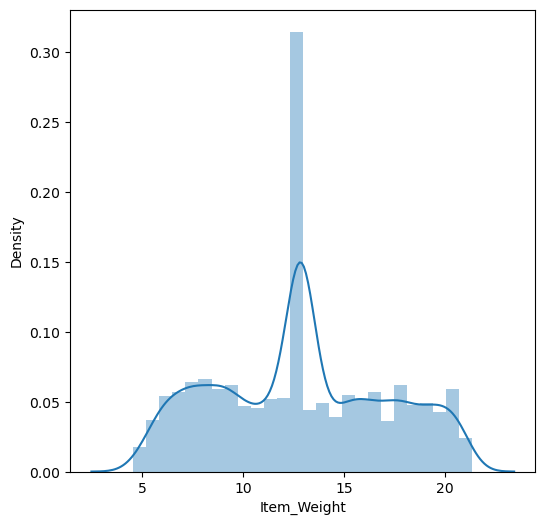

In [16]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Weight'])
plt.show()

#### Item_Visibilty Distribution

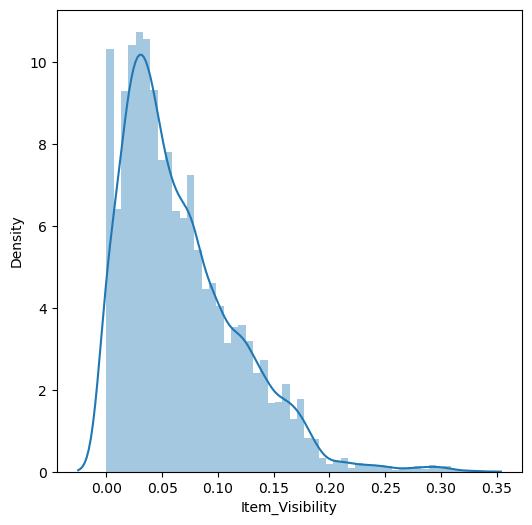

In [17]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Visibility'])
plt.show()

#### Item_MRP Distribution

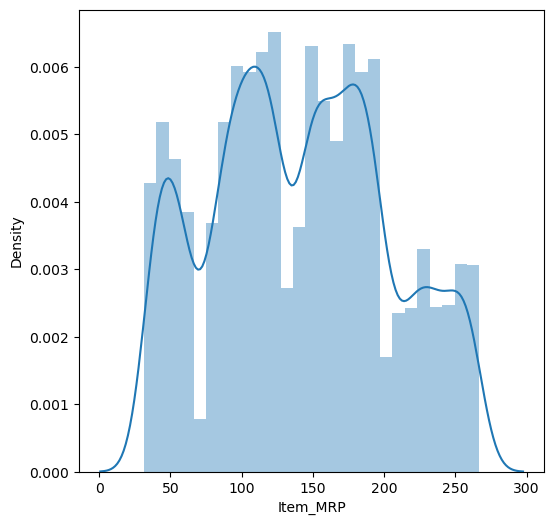

In [18]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_MRP'])
plt.show()

#### Item_Outlet_Sales Distribution

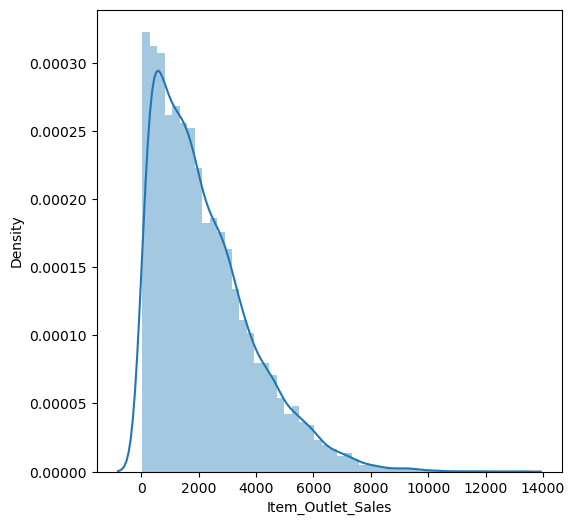

In [19]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

#### Outlet_Establishment_Year Column

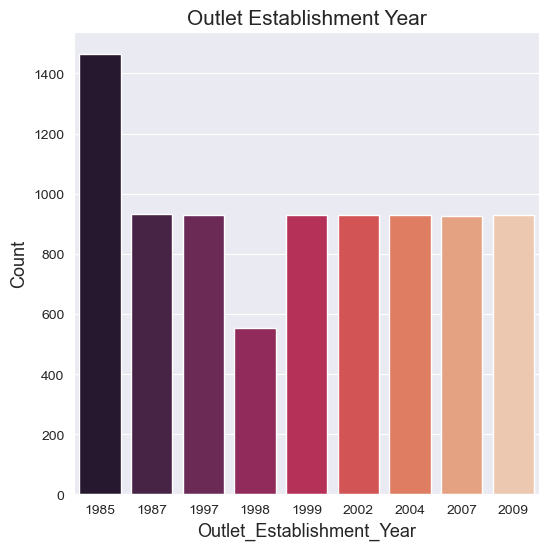

In [20]:
# Creating a figure with a custom size
plt.figure(figsize=(6,6))

# Setting the seaborn theme to Darkgrid
sns.set_style(style='darkgrid')

# Creating a countplot with Outlet_Establishment_Year
sns.countplot(x='Outlet_Establishment_Year', data=df, palette='rocket')

# Setting the title of the plot
plt.title('Outlet Establishment Year', fontsize=15)

# Setting the x label
plt.xlabel('Outlet_Establishment_Year', fontsize = 13)

# Setting the y label
plt.ylabel('Count', fontsize=13)
plt.show()

#### Item_Fat_Content Column

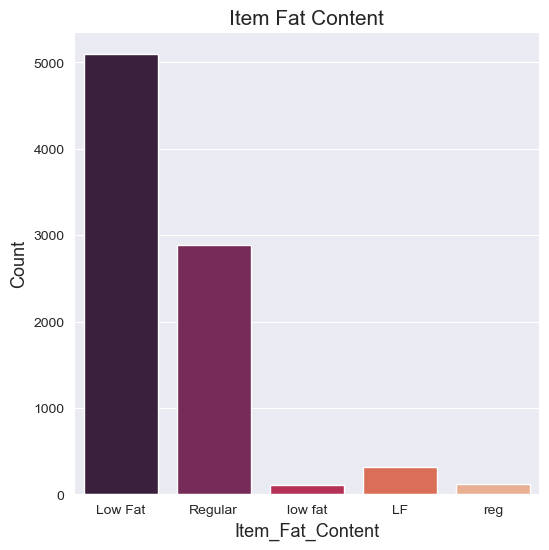

In [21]:
# Setting a figure with a custom size
plt.figure(figsize=(6,6))

# Setting the seaborn theme to Darkgrid
sns.set_style(style='darkgrid')

# Creating a countplot with Item_Fat_Content
sns.countplot(x='Item_Fat_Content', data=df, palette='rocket')

# Setting the title of the plot
plt.title('Item Fat Content', fontsize=15)

# Setting the x label
plt.xlabel('Item_Fat_Content', fontsize=13)

# Setting the y label
plt.ylabel('Count', fontsize=13)
plt.show()

#### Item_Type Column

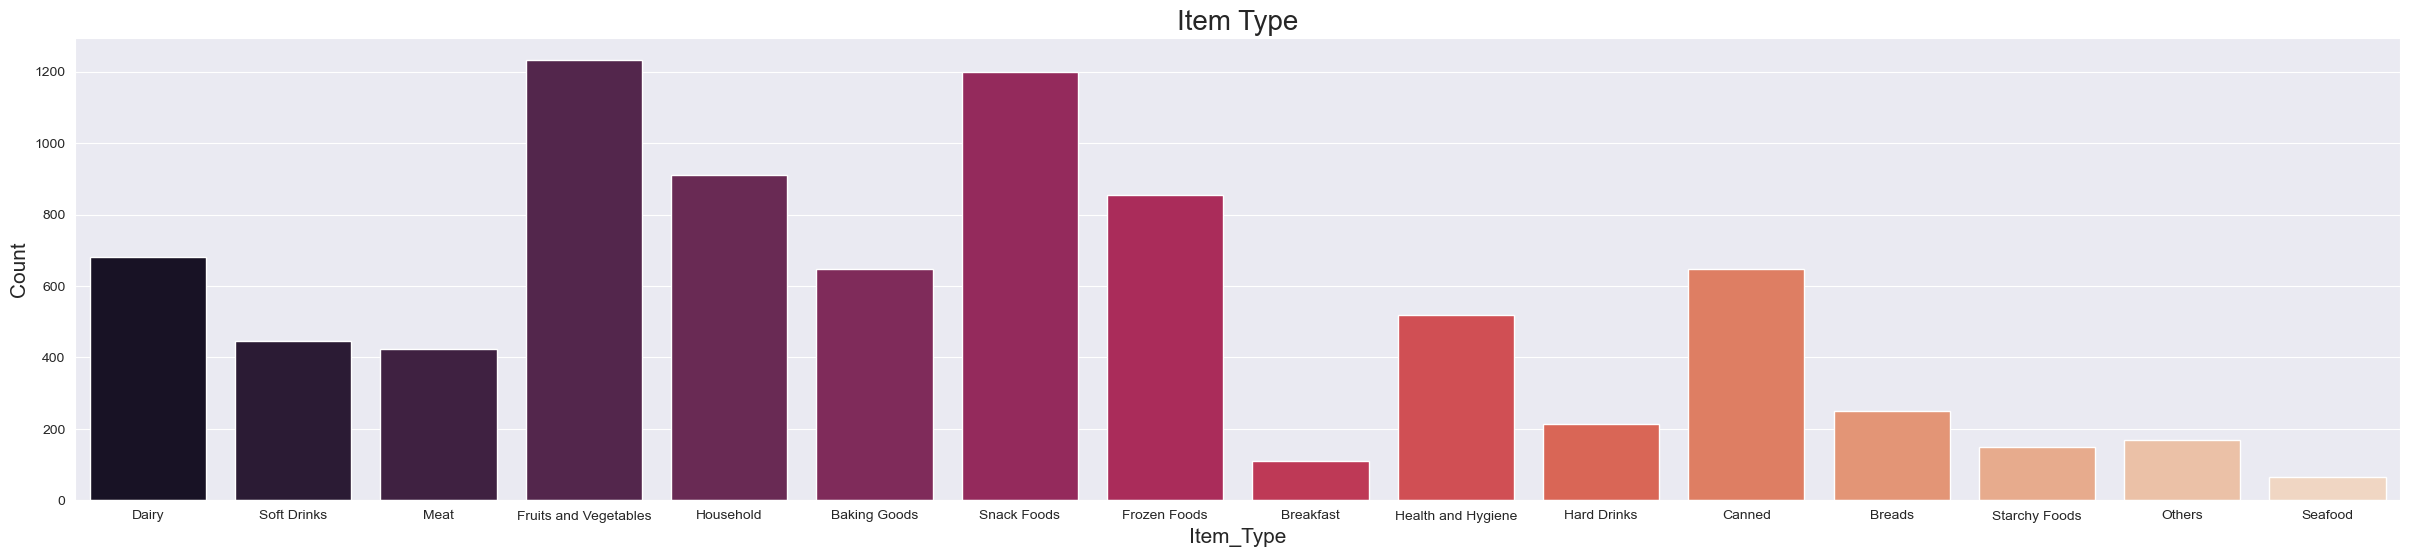

In [22]:
# Setting a figure with a custom figure
plt.figure(figsize=(30,6))

# Setting the seaborn theme to Darkgrid
sns.set_style(style='darkgrid')

# Creating a countplot with Item_Type
sns.countplot(x='Item_Type', data=df, palette='rocket')

# Setting the title of the plot
plt.title('Item Type', fontsize=20)

# Setting the x label
plt.xlabel('Item_Type', fontsize=15)

# Setting the y label
plt.ylabel('Count', fontsize=15)
plt.show()

#### Outlet_Size Column

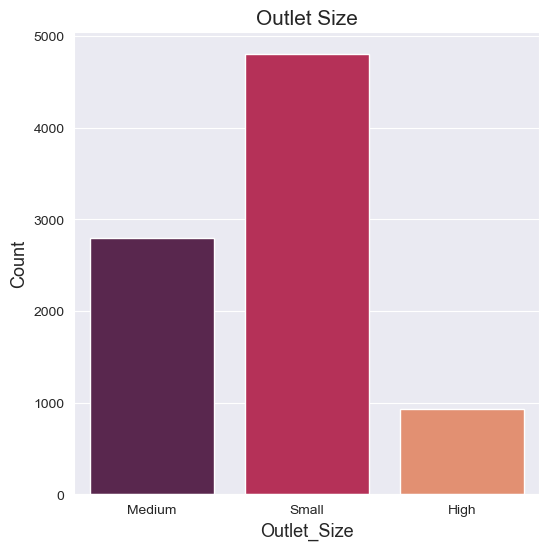

In [23]:
# Setting a figure with a custom size
plt.figure(figsize=(6,6))

# Setting a seaborn theme to darkgrid
sns.set_style(style='darkgrid')

# Creating a countplot with Outlet_Size
sns.countplot(x='Outlet_Size', data=df, palette='rocket')

# Setting the title of the plot
plt.title('Outlet Size', fontsize=15)

# Setting the x label
plt.xlabel('Outlet_Size', fontsize=13)

# Setting the y label
plt.ylabel('Count', fontsize=13)
plt.show()

## Data Pre-processing

In [24]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [25]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [26]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [27]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

### Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
encoder = LabelEncoder()

In [30]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])

df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])

df['Item_Type'] = encoder.fit_transform(df['Item_Type'])

df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])

df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])

df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])

df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [31]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


## Model Building and Evaluation

### Splitting features and Targets

In [32]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [33]:
print(X)

[[1.560e+02 9.300e+00 0.000e+00 ... 1.000e+00 0.000e+00 1.000e+00]
 [8.000e+00 5.920e+00 1.000e+00 ... 1.000e+00 2.000e+00 2.000e+00]
 [6.620e+02 1.750e+01 0.000e+00 ... 1.000e+00 0.000e+00 1.000e+00]
 ...
 [1.357e+03 1.060e+01 0.000e+00 ... 2.000e+00 1.000e+00 1.000e+00]
 [6.810e+02 7.210e+00 1.000e+00 ... 1.000e+00 2.000e+00 2.000e+00]
 [5.000e+01 1.480e+01 0.000e+00 ... 2.000e+00 0.000e+00 1.000e+00]]


In [34]:
print(y)

[3735.138   443.4228 2097.27   ... 1193.1136 1845.5976  765.67  ]


### Splitting into Train Test Splits

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


### Training Algorithm

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
model = Sequential()

model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))

model.add(Dense(1))     # Output Layer

model.compile(optimizer = 'rmsprop', loss='mse')

In [39]:
model.fit(x = X_train, y = y_train, epochs=50)

Epoch 1/50
214/214 [==============================] - 0s 850us/step - loss: 4087663.5000
Epoch 2/50
214/214 [==============================] - 0s 798us/step - loss: 2883989.0000
Epoch 3/50
214/214 [==============================] - 0s 744us/step - loss: 2769298.2500
Epoch 4/50
214/214 [==============================] - 0s 781us/step - loss: 2658585.5000
Epoch 5/50
214/214 [==============================] - 0s 781us/step - loss: 2542341.2500
Epoch 6/50
214/214 [==============================] - 0s 778us/step - loss: 2398276.7500
Epoch 7/50
214/214 [==============================] - 0s 854us/step - loss: 2225358.7500
Epoch 8/50
214/214 [==============================] - 0s 835us/step - loss: 2069133.0000
Epoch 9/50
214/214 [==============================] - 0s 788us/step - loss: 1980070.5000
Epoch 10/50
214/214 [==============================] - 0s 882us/step - loss: 1945479.8750
Epoch 11/50
214/214 [==============================] - 0s 809us/step - loss: 1931303.7500
Epoch 12/50
214/214

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [42]:
loss_df = pd.DataFrame(model.history.history)

In [43]:
loss_df

,loss
0,4087663.500
1,2883989.000
2,2769298.250
3,2658585.500
4,2542341.250
5,2398276.750
6,2225358.750
7,2069133.000
8,1980070.500
9,1945479.875


<Axes: >

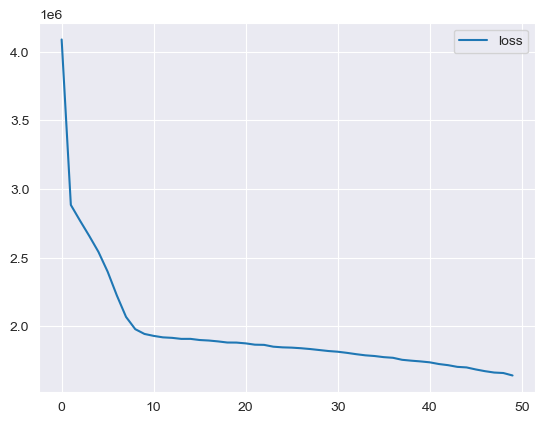

In [44]:
loss_df.plot()

#### _From the graph, we can see that the model’s loss is decreasing significantly._

### Model Evaluation

In [45]:
# Model Evaluation on test data
test_eval = model.evaluate(X_test, y_test, verbose=0)
print(test_eval)

1768189.875


In [46]:
# Model Evaluation on train set
train_eval = model.evaluate(X_train, y_train, verbose=0)
print(test_eval)

1768189.875


In [48]:
# Checking the difference between train_eval and test_eval
model_diff = train_eval - test_eval
print(model_diff)

-27469.0


In [49]:
# Train prediction on test data
train_prediction = model.predict(X_train)

In [51]:
# Test predicition on test data
test_prediction = model.predict(X_test)

In [52]:
print(train_prediction)

[[2776.643 ]
 [1156.9764]
 [1275.3442]
 ...
 [1468.8796]
 [2264.6687]
 [3504.3477]]


In [53]:
print(test_prediction)

[[2976.7678 ]
 [1778.3073 ]
 [1968.756  ]
 ...
 [4361.677  ]
 [ 693.54706]
 [4927.399  ]]


In [55]:
# R Squared : R-squared measures the strength of the relationship between model and the dependent variable on a convenient 0 – 100% scale.
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, train_prediction)

In [56]:
print('R Squared value of train data: ', r2_train)

R Squared value of train data:  0.40140421086147426


In [57]:
r2_test = r2_score(y_test, test_prediction)

In [58]:
print('R Squared value of test data: ', r2_test)

R Squared value of test data:  0.3958746727000383
